<a href="https://colab.research.google.com/github/javachka11/Laba_2/blob/main/Sem6_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Импорт библиотек**

In [ ]:
from typing import List
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from decimal import Decimal

# **Алгоритм прогонки**

In [ ]:
Matrix = List[List[float]]
Vector = List[float]

def progonka(X: Matrix, V: Vector):
  A_arr = []
  B_arr = []
  A0 = - X[0][1] / X[0][0]
  B0 = V[0] / X[0][0]
  A_arr.append(A0)
  B_arr.append(B0)
  for i in range(1, len(X) - 1):
    Ai = - X[i][i+1] / (X[i][i] + X[i][i-1]*A_arr[i-1])
    Bi = (V[i] - X[i][i-1]*B_arr[i-1]) / (X[i][i] + X[i][i-1]*A_arr[i-1])
    A_arr.append(Ai)
    B_arr.append(Bi)

  An = 0
  Bn = ( (V[len(X)-1] - X[len(X)-1][len(X)-2]*B_arr[len(X)-2]) / 
        (X[len(X)-1][len(X)-1] + X[len(X)-1][len(X)-2]*A_arr[len(X)-2]) )

  yn = Bn
  y_arr = []
  y_arr.append(yn)
  for i in range(len(X) - 2, -1, -1):
    yi = B_arr[i] + A_arr[i]*y_arr[len(X) - i - 2]
    y_arr.append(yi)
  
  y_arr.reverse()

  return y_arr

# **Разностное решение (1-го и 2-го порядков) задачи на теплопроводность**

In [ ]:
def uniform_net(a, b, h):
  step = (b - a) / ((b - a) / h) # шаг сетки
  nodes = []
  nodes.append(a)
  x = a
  while x != b:
    x = Decimal(str(x)) + Decimal(str(step))
    nodes.append(float(x))
  return nodes

def heat_task(t0, a, b, coef, func, u_x0, border_coeffs_a, border_coeffs_b):
  return (t0, a, b, coef, func, u_x0, border_coeffs_a, border_coeffs_b)

def solver_1(t, wt, net, arr, sigma, h, tau):
  if t == wt[0]:
    arr[0] = [wt[5](x) for x in net]
    arr[1] = [y for y in arr[0]]
  else:
    f_arr = [wt[4](x, t-tau/2) for x in net]
    X = []
    V = []
    X.append([])
    X[0].append(-wt[6][0]/h + wt[6][1])
    X[0].append(wt[6][0]/h)
    V.append(wt[6][2](t))
    for i in range(1, len(net)-1):
      X.append([])
      for j in range(i-1):
        X[i].append(0)
      X[i].append(sigma*wt[3]*tau/h**2)
      X[i].append(-2*sigma*wt[3]*tau/h**2 - 1)
      X[i].append(sigma*wt[3]*tau/h**2)
      V.append(-arr[0][i] - f_arr[i]*tau - (1-sigma)*wt[3]*tau/h**2*(arr[0][i+1]-2*arr[0][i]+arr[0][i-1]))
    
    X.append([])
    for j in range(len(net)-2):
        X[len(net)-1].append(0)
    X[len(net)-1].append(-wt[7][0]/h)
    X[len(net)-1].append(wt[7][0]/h + wt[7][1])
    V.append(wt[7][2](t))

    arr[1] = progonka(X, V)
    arr[0] = [x for x in arr[1]]

def solver_2(t, wt, net, arr, sigma, h, tau):
  if t == wt[0]:
    arr[0] = [wt[5](x) for x in net]
    arr[1] = [y for y in arr[0]]
  else:
    f_arr = [wt[4](x, t-tau/2) for x in net]
    X = []
    V = []
    X.append([])
    X[0].append(2*sigma*wt[3]*tau/h**2 - 2*sigma*wt[6][1]*wt[3]*tau/(wt[6][0]*h) + 1)
    X[0].append(-2*sigma*wt[3]*tau/h**2)
    V.append(tau*f_arr[0] + 2*(1-sigma)*wt[3]*tau/h**2 * 
             (arr[0][1]-arr[0][0]+h*wt[6][1]*arr[0][0]/wt[6][0]-h*wt[6][2](t-tau)/wt[6][0]) -
             2*sigma*wt[3]*tau*wt[6][2](t)/(h*wt[6][0]) + arr[0][0])
    for i in range(1, len(net)-1):
      X.append([])
      for j in range(i-1):
        X[i].append(0)
      X[i].append(sigma*wt[3]*tau/h**2)
      X[i].append(-2*sigma*wt[3]*tau/h**2 - 1)
      X[i].append(sigma*wt[3]*tau/h**2)
      V.append(-arr[0][i] - f_arr[i]*tau - (1-sigma)*wt[3]*tau/h**2*(arr[0][i+1]-2*arr[0][i]+arr[0][i-1]))
    
    X.append([])
    for j in range(len(net)-2):
        X[len(net)-1].append(0)
    X[len(net)-1].append(-2*sigma*wt[3]*tau/h**2)
    X[len(net)-1].append(2*sigma*wt[3]*tau/h**2 + 2*sigma*wt[7][1]*wt[3]*tau/(wt[7][0]*h) + 1)
    V.append(tau*f_arr[-1] + 2*(1-sigma)*wt[3]*tau/h**2 * 
             (arr[0][-2]-arr[0][-1]-h*wt[7][1]*arr[0][-1]/wt[7][0]+h*wt[7][2](t-tau)/wt[7][0]) +
             2*sigma*wt[3]*tau*wt[7][2](t)/(h*wt[7][0]) + arr[0][-1])

    arr[1] = progonka(X, V)
    arr[0] = [x for x in arr[1]]


def solver(t, wt, net, arr, sigma, h, tau, order, ax, min_val=-2.5, max_val=2.5):
  if order == 1:
    solver_1(t, wt, net, arr, sigma, h, tau)
    ax.clear()
    x1,x2,y1,y2 = ax.axis()
    ax.axis((x1,x2,min_val,max_val))
    line = ax.plot(net, arr[1])
    return line
  elif order == 2:
    solver_2(t, wt, net, arr, sigma, h, tau)
    ax.clear()
    x1,x2,y1,y2 = ax.axis()
    ax.axis((x1,x2,min_val,max_val))
    line = ax.plot(net, arr[1])
    return line
  else:
    print('error!')

# **Основная задача**

In [ ]:
def ex1_f(x, t):
  return (x + 2*t**2 * math.tanh(x*t)) / math.cosh(x*t)**2

def ex1_u1(x):
  return x

def ex1_u2(t):
  return 1 + t

def ex1_u3(t):
  return 1 + t/math.cosh(t)**2

'''def ex2_f(x, t):
  return math.exp(x)/2*(1/math.cos(t)**2-math.tan(t))

def ex2_u1(x):
  return -x/2

def ex2_u2(t):
  return math.tan(t) - 0.5

def ex2_u3(t):
  return (math.e*math.tan(t)-1)/2'''

In [ ]:
def ans(t, net, ax):
  y_arr = [net[i] + math.tanh(net[i]*t) for i in range(len(net))]
  ax.clear()
  x1,x2,y1,y2 = ax.axis()
  ax.axis((x1,x2,-2, 4))
  line = ax.plot(net, y_arr)
  return line

def ans_res(t, net):
  y_arr = [net[i] + math.tanh(net[i]*t) for i in range(len(net))]
  return y_arr

'''def ans2(t, net, ax):
  y_arr = [(math.exp(net[i])*math.tan(t)-net[i])/2 for i in range(len(net))]
  ax.clear()
  x1,x2,y1,y2 = ax.axis()
  ax.axis((x1,x2,-5, 20))
  line = ax.plot(net, y_arr)
  return line'''

In [ ]:
def abs_error(arr1, arr2):
  assert len(arr1)==len(arr2)
  array = [math.fabs(arr1[i] - arr2[i]) for i in range(len(arr1))]
  return array

In [ ]:
def main():
  fig, ax = plt.subplots()

  h = 0.001
  tau = 0.01

  t_arr = uniform_net(0, 3, tau)
  net = uniform_net(0, 1, h)

  ht = heat_task(0, 0, 1, 1, ex1_f, ex1_u1, (1, 1, ex1_u2), (1, 0, ex1_u3))
  arr = 3*[len(net)*[0]]
  
  ht_animation = animation.FuncAnimation(fig,
                                      solver,
                                      frames=t_arr,
                                      fargs = (ht, net, arr, 1/2, h, tau, 2, ax, -2, 4),
                                      #fargs = (net, ax),
                                      interval = 50,
                                      repeat = False)
  ht_animation.save('heat_task_2.gif',
                    writer = 'pillow',
                    fps = 30)

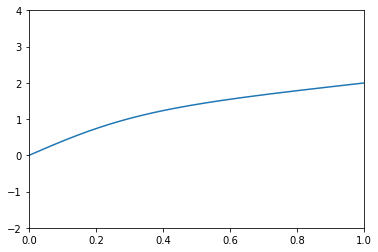

In [ ]:
main()

In [ ]:
def error_task():
  h = 0.001
  tau = 0.01

  t_arr = uniform_net(0, 3, tau)
  net = uniform_net(0, 1, h)

  ht = heat_task(0, 0, 1, 1, ex1_f, ex1_u1, (1, 1, ex1_u2), (1, 0, ex1_u3))
  arr = 3*[len(net)*[0]]
  err1 = []
  err2 = []
  for t in t_arr:
    solver_1(t, ht, net, arr, 1/2, h, tau)
    res = ans_res(t, net)
    err1.append(max(abs_error(arr[1], res)))

  for t in t_arr:
    solver_2(t, ht, net, arr, 1/2, h, tau)
    res = ans_res(t, net)
    err2.append(max(abs_error(arr[1], res)))
  
  print('Максимальное значение ошибки на сетке для 1-го порядка: ', max(err1))
  print('Максимальное значение ошибки на сетке для 2-го порядка: ', max(err2))


In [ ]:
error_task()

Максимальное значение ошибки на сетке для 1-го порядка:  0.008334681952485892
Максимальное значение ошибки на сетке для 2-го порядка:  0.0007727656972282026
